In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
class SVM:
    def __init__(self, C=1.0, gamma=0.1, eta=0.001, n_iters=1000, kernel='linear'):
        self.C = C
        self.gamma = gamma
        self.eta = eta
        self.n_iters = n_iters
        self.kernel = kernel
        self.alpha = None
        self.support_vectors = None
        self.support_y = None
        self.b = 0

    def kernel_function(self, x1, x2):
        if self.kernel == 'linear':
            return np.dot(x1, x2)
        elif self.kernel == 'rbf':
            return np.exp(-self.gamma * np.linalg.norm(x1 - x2) ** 2)
        else:
            raise ValueError("Unsupported kernel")

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.alpha = np.zeros(n_samples)
        self.support_vectors = X
        self.support_y = y

        for _ in range(self.n_iters):
            for i in range(n_samples):
                if y[i] * self.project(X[i]) < 1:
                    self.alpha[i] += self.eta
                    self.b += self.eta * y[i]

    def project(self, X):
        result = 0
        for alpha, sv_y, sv in zip(self.alpha, self.support_y, self.support_vectors):
            result += alpha * sv_y * self.kernel_function(sv, X)
        return result + self.b

    def predict(self, X):
        return np.sign(np.array([self.project(x) for x in X]))

In [3]:
# Load Dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
#params = {'C' : [0.1, 1.0, 10.0], 'gamma' : [0.01, 0.1, 1.0]}
#best_params = {'C' : 1.0, 'gamma' : 0.1}

In [7]:
# Train model for each class
unique_classes = np.unique(y)
models = {}

In [64]:
for cls in unique_classes:
    binary_y_train = np.where(y_train == cls, 1, -1)
    svm = SVM(C=1.0, gamma=0.1, eta=0.001, n_iters=1000, kernel='rbf')
    svm.fit(X_train, binary_y_train)
    models[cls] = svm

TypeError: SVM() takes no arguments

In [59]:
# Predictions
y_pred = np.array([max(models, key=lambda cls: models[cls].project(x)) for x in X_test])

ValueError: max() arg is an empty sequence

In [61]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

NameError: name 'y_pred' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

class SVM:
    def __init__(self, C=1.0, gamma=0.1, eta=0.001, n_iters=1000, kernel='linear'):
        self.C = C
        self.gamma = gamma
        self.eta = eta
        self.n_iters = n_iters
        self.kernel = kernel
        self.alpha = None
        self.support_vectors = None
        self.support_y = None
        self.b = 0

    def kernel_function(self, x1, x2):
        if self.kernel == 'linear':
            return np.dot(x1, x2)
        elif self.kernel == 'rbf':
            return np.exp(-self.gamma * np.linalg.norm(x1 - x2) ** 2)
        else:
            raise ValueError("Unsupported kernel")

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.alpha = np.zeros(n_samples)
        self.support_vectors = X
        self.support_y = y

        for _ in range(self.n_iters):
            for i in range(n_samples):
                if y[i] * self.project(X[i]) < 1:
                    self.alpha[i] += self.eta
                    self.b += self.eta * y[i]

    def project(self, X):
        result = 0
        for alpha, sv_y, sv in zip(self.alpha, self.support_y, self.support_vectors):
            result += alpha * sv_y * self.kernel_function(sv, X)
        return result + self.b

    def predict(self, X):
        return np.sign(np.array([self.project(x) for x in X]))

# Load Dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Model for Each Class
unique_classes = np.unique(y)
models = {}

for cls in unique_classes:
    binary_y_train = np.where(y_train == cls, 1, -1)
    svm = SVM(C=1.0, gamma=0.1, eta=0.001, n_iters=1000, kernel='rbf')
    svm.fit(X_train, binary_y_train)
    models[cls] = svm

# Predictions
y_pred = np.array([max(models, key=lambda cls: models[cls].project(x)) for x in X_test])

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualization
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = np.array([model.project(np.array([xx_i, yy_i])) for xx_i, yy_i in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='k')
    plt.title("Decision Boundary")
    plt.show()

# Plotting only two features for visualization
plot_decision_boundary(models[0], X_train[:, :2], y_train)


In [17]:
# Select only two features (first two features for visualization)
X_train_2D = X_train[:, :2]
X_test_2D = X_test[:, :2]

models = {}
for cls in unique_classes:
    binary_y_train = np.where(y_train == cls, 1, -1)
    svm = SVM(C=1.0, gamma=0.1, eta=0.001, n_iters=1000, kernel='rbf')
    svm.fit(X_train_2D, binary_y_train)
    models[cls] = svm

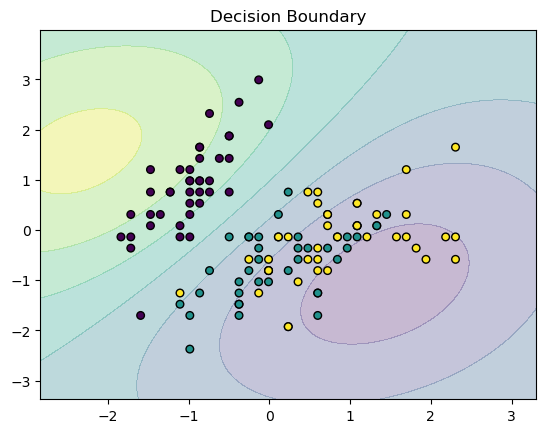

In [18]:
# Visualization only with two features
plot_decision_boundary(models[0], X_train_2D, y_train)

Accuracy: 0.80

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.64      0.78      0.70         9
           2       0.78      0.64      0.70        11

    accuracy                           0.80        30
   macro avg       0.80      0.80      0.80        30
weighted avg       0.81      0.80      0.80        30


Confusion Matrix:
 [[10  0  0]
 [ 0  7  2]
 [ 0  4  7]]


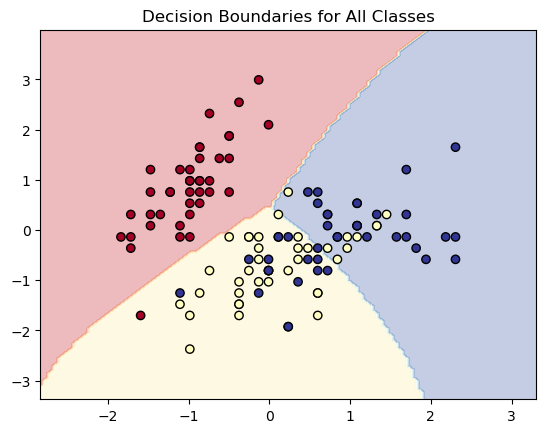

In [21]:
# Train Model for Each Class with Two Features for Visualization
unique_classes = np.unique(y)
models = {}
X_train_2D = X_train[:, :2]  # Selecting two features
X_test_2D = X_test[:, :2]

# Training One-vs-All Classifiers
for cls in unique_classes:
    binary_y_train = np.where(y_train == cls, 1, -1)
    svm = SVM(C=1.0, gamma=0.1, eta=0.001, n_iters=1000, kernel='rbf')
    svm.fit(X_train_2D, binary_y_train)
    models[cls] = svm

# Predictions using One-vs-All approach
def predict_all(models, X):
    decision_values = np.array([models[cls].project(X) for cls in models.keys()])
    return np.argmax(decision_values, axis=0)

# Make Predictions
y_pred = np.array([predict_all(models, x) for x in X_test_2D])

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualization of Decision Boundaries
def plot_all_boundaries(models, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = np.array([predict_all(models, np.array([xx_i, yy_i])) for xx_i, yy_i in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdYlBu)
    plt.title("Decision Boundaries for All Classes")
    plt.show()

# Plot Decision Boundaries
plot_all_boundaries(models, X_train_2D, y_train)
